In [8]:
import numpy as np
import pandas as pd
import os

from torch.xpu import device

df_org = pd.read_pickle("/home/unsi/다운로드/LSWMD.pkl")
df_org

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]
...,...,...,...,...,...,...
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[]


In [9]:
df = df_org
df = df[df['waferMap'].apply(lambda x:x.shape==(26,26))]
df

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
150,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2,...",533.0,lot7,1.0,[[Training]],[[none]]
151,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1,...",533.0,lot7,2.0,[[Training]],[[none]]
152,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1,...",533.0,lot7,3.0,[[Training]],[[none]]
153,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1,...",533.0,lot7,4.0,[[Training]],[[none]]
154,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,...",533.0,lot7,5.0,[[Training]],[[none]]
...,...,...,...,...,...,...
679275,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1,...",533.0,lot42180,20.0,[],[]
679276,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2,...",533.0,lot42180,21.0,[],[]
679277,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,...",533.0,lot42180,22.0,[],[]
679278,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2,...",533.0,lot42180,23.0,[],[]


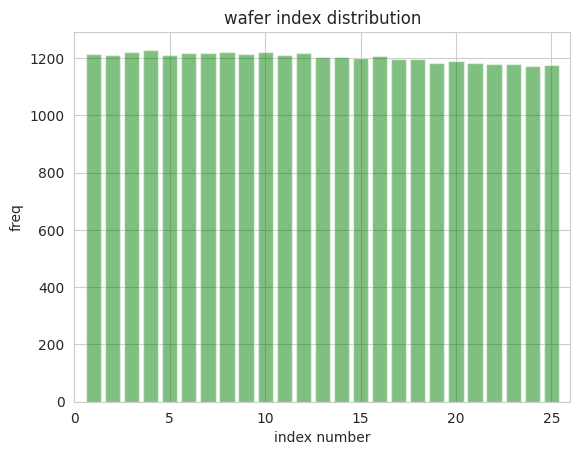

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

uni_Index=np.unique(df.waferIndex, return_counts=True)
plt.bar(uni_Index[0],uni_Index[1], color='green', align='center', alpha=0.5)
plt.title("wafer index distribution")
plt.xlabel("index number")
plt.ylabel("freq")
plt.xlim(0,26)
plt.ylim()
plt.show()

In [743]:
df=df.drop(['waferIndex'], axis=1)

In [744]:
df

,waferMap,dieSize,lotName,trianTestLabel,failureType
150,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2,...",533.0,lot7,[[Training]],[[none]]
151,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1,...",533.0,lot7,[[Training]],[[none]]
152,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1,...",533.0,lot7,[[Training]],[[none]]
153,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1,...",533.0,lot7,[[Training]],[[none]]
154,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,...",533.0,lot7,[[Training]],[[none]]
...,...,...,...,...,...
679275,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1,...",533.0,lot42180,[],[]
679276,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2,...",533.0,lot42180,[],[]
679277,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,...",533.0,lot42180,[],[]
679278,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2,...",533.0,lot42180,[],[]


In [327]:
df['failureNum']=df.failureType
df['trainTestNum']=df.trianTestLabel
mapping_type={'Center':0, 'Near-full':1, 'Edge-Loc':2, 'Edge-Ring':3, 'Loc':4, 'Random':5,'Scratch':6, 'Donut':7, 'none':8}
mapping_traintest={'Training':0, 'Test':1}
df=df.replace({'failureNum':mapping_type, 'trainTestNum':mapping_traintest})

In [420]:
tol_wafers=df.shape[0] # 행 갯수 반환
tol_wafers

30078

In [716]:
df

,waferMap,dieSize,lotName,trianTestLabel,failureType
150,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2,...",533.0,lot7,[[Training]],[[none]]
151,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1,...",533.0,lot7,[[Training]],[[none]]
152,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1,...",533.0,lot7,[[Training]],[[none]]
153,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1,...",533.0,lot7,[[Training]],[[none]]
154,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,...",533.0,lot7,[[Training]],[[none]]
...,...,...,...,...,...
679275,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1,...",533.0,lot42180,[],[]
679276,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2,...",533.0,lot42180,[],[]
679277,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,...",533.0,lot42180,[],[]
679278,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2,...",533.0,lot42180,[],[]


In [330]:
df_withlabel = df[(df['failureNum']>=0) & (df['failureNum']<=8)] # 새로운 데이터 프레임 생성
df_withlabel = df_withlabel.reset_index() # 앞에서 생성한 데이터 프레임의 인덱스 재설정
df_withpattern = df[(df['failureNum']>=0) & (df['failureNum']<=7)] # 새로운 데이터 프레임 생성
df_withpattern = df_withpattern.reset_index() # 데이터 프레임 인덱스 재설정
df_nonpattern = df[(df['failureNum']==8)] # 새로운 데이터 프레임 생성
df_withlabel.shape[0], df_withpattern.shape[0], df_nonpattern.shape[0] # 각 데이터 프레임 행 갯수 반환

(14366, 877, 13489)

C:\Users\배현제\AppData\Local\Temp\ipykernel_13724\606641776.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(labels2)


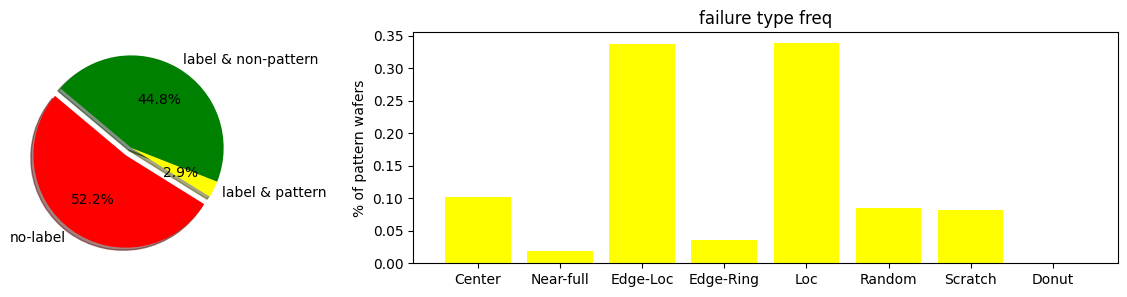

In [333]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import gridspec
figure = plt.figure(figsize=(15,3))
gridspec = gridspec.GridSpec(1, 2, width_ratios=[1,2])
ax1 = plt.subplot(gridspec[0])
ax2 = plt.subplot(gridspec[1])

no_wafers=[tol_wafers-df_withlabel.shape[0], df_withpattern.shape[0], df_nonpattern.shape[0]]

colors = ['red', 'yellow', 'green']
explode = (0.1, 0, 0)
labels = ['no-label', 'label & pattern', 'label & non-pattern']
ax1.pie(no_wafers, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

uni_pattern=np.unique(df_withpattern.failureNum, return_counts=True)
labels2=['','Center','Near-full','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Donut']
ax2.bar(uni_pattern[0],uni_pattern[1]/df_withpattern.shape[0], color='yellow', align='center', alpha=1)
ax2.set_title("failure type freq")
ax2.set_ylabel("% of pattern wafers")
ax2.set_xticklabels(labels2)

plt.show()

In [536]:
filtering = df[df['failureType'].apply(lambda x:x.shape == (0, 0) or x[0][0] == 'none')]
filtering['failureType'] = 8
filtering

C:\Users\배현제\AppData\Local\Temp\ipykernel_13724\169458020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtering['failureType'] = 8


,waferMap,dieSize,lotName,trianTestLabel,failureType
150,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2,...",533.0,lot7,[[Training]],8
151,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1,...",533.0,lot7,[[Training]],8
152,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1,...",533.0,lot7,[[Training]],8
153,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1,...",533.0,lot7,[[Training]],8
154,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,...",533.0,lot7,[[Training]],8
...,...,...,...,...,...
679275,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1,...",533.0,lot42180,[],8
679276,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2,...",533.0,lot42180,[],8
679277,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,...",533.0,lot42180,[],8
679278,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2,...",533.0,lot42180,[],8


In [335]:
valid = df[df['failureType'].apply(lambda x: len(x) >0 and len(x[0]) > 0 and x[0][0] != 'none')]
valid

,waferMap,dieSize,lotName,trianTestLabel,failureType,failureNum,trainTestNum
186,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1,...",533.0,lot8,[[Training]],[[Edge-Ring]],3,0
264,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1,...",533.0,lot11,[[Training]],[[Edge-Loc]],2,0
377,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2,...",533.0,lot16,[[Training]],[[Edge-Loc]],2,0
381,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,...",533.0,lot16,[[Training]],[[Edge-Loc]],2,0
397,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2,...",533.0,lot16,[[Training]],[[Edge-Loc]],2,0
...,...,...,...,...,...,...,...
679154,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1,...",533.0,lot42175,[[Test]],[[Loc]],4,1
679165,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1,...",533.0,lot42176,[[Test]],[[Center]],0,1
679167,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2,...",533.0,lot42176,[[Test]],[[Edge-Loc]],2,1
679176,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1,...",533.0,lot42176,[[Test]],[[Edge-Loc]],2,1


In [469]:
df

,waferMap,dieSize,lotName,trianTestLabel,failureType
150,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2,...",533.0,lot7,[[Training]],8
151,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1,...",533.0,lot7,[[Training]],8
152,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1,...",533.0,lot7,[[Training]],8
153,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1,...",533.0,lot7,[[Training]],8
154,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,...",533.0,lot7,[[Training]],8
...,...,...,...,...,...
679275,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1,...",533.0,lot42180,[],8
679276,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2,...",533.0,lot42180,[],8
679277,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,...",533.0,lot42180,[],8
679278,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2,...",533.0,lot42180,[],8


In [10]:
mapping_type={'Center':0, 'Near-full':1, 'Edge-Loc':2, 'Edge-Ring':3, 'Loc':4, 'Random':5,'Scratch':6, 'Donut':7, 'none':8}

def map_failure_type(failure_list):
    # numpy array를 리스트로 변환
    if isinstance(failure_list, np.ndarray):
        failure_list = failure_list.tolist()

    # 리스트 안에 리스트가 있으면 첫 번째 원소를 추출
    while isinstance(failure_list, list) and len(failure_list) > 0:
        if isinstance(failure_list[0], list):
            failure_list = failure_list[0]  # 첫 번째 리스트 추출
        else:
            break  # 더 이상 리스트가 아닐 때 중단

    # 빈 리스트 또는 'none', None 값 처리
    if not failure_list or failure_list[0] in ['none', None]:
        return 8

    # 실패 타입을 class2idx 딕셔너리에서 매핑, 없으면 8 반환
    return mapping_type.get(failure_list[0], 8)

df['failureType'] = df['failureType'].apply(map_failure_type)
print(df['failureType'])


150       8
151       8
152       8
153       8
154       8
         ..
679275    8
679276    8
679277    8
679278    8
679279    8
Name: failureType, Length: 30078, dtype: int64


/tmp/ipykernel_12919/561769166.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['failureType'] = df['failureType'].apply(map_failure_type)


In [11]:
df[df['failureType'] != 8]

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
186,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1,...",533.0,lot8,12.0,[[Training]],3
264,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1,...",533.0,lot11,15.0,[[Training]],2
377,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2,...",533.0,lot16,3.0,[[Training]],2
381,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,...",533.0,lot16,7.0,[[Training]],2
397,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2,...",533.0,lot16,23.0,[[Training]],2
...,...,...,...,...,...,...
679154,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1,...",533.0,lot42175,24.0,[[Test]],4
679165,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1,...",533.0,lot42176,10.0,[[Test]],0
679167,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2,...",533.0,lot42176,12.0,[[Test]],2
679176,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1,...",533.0,lot42176,21.0,[[Test]],2


In [7]:
df = df.drop('failureNum', axis=1)
df = df.drop('trainTestNum', axis=1)
df

KeyError: "['failureNum'] not found in axis"

In [747]:
df['failureType'].value_counts()

failureType
8    29201
4      297
2      296
0       90
5       74
6       72
3       31
1       16
7        1
Name: count, dtype: int64

In [12]:
features = df['waferMap']
targets = df['failureType']

In [13]:
from scipy.ndimage import gaussian_filter, median_filter, rotate
from sklearn.cluster import DBSCAN
import numpy as np
# 1. 필터링 - 양방향 필터와 가우시안 필터 적용
def apply_advanced_filter_to_features(features, targets):
    filtered_maps = []
    corresponding_targets = []

    for wafer_map, failure_type in zip(features, targets):
        # 미디언 필터 적용 (크기 3x3)
        median_filtered = median_filter(wafer_map, size=3)
        # 가우시안 필터 적용 (sigma=1)
        # gaussian_filtered = gaussian_filter(median_filtered, sigma=1)

        # 결함 이외의 부분은 그대로 유지
        filtered_map = np.where(wafer_map == 0, 0, median_filtered)
        filtered_maps.append(filtered_map)
        corresponding_targets.append(failure_type)

    return np.array(filtered_maps), np.array(corresponding_targets)
features, targets = apply_advanced_filter_to_features(features, targets)

In [14]:
features[0]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0],
       [0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [15]:
from sklearn.model_selection import train_test_split
from collections import Counter

# 각 클래스의 개수를 확인
class_counts = Counter(targets)
print("클래스 분포:", class_counts)

# 데이터가 2개 미만인 클래스 제거
valid_classes = [cls for cls, count in class_counts.items() if count >= 2]
mask = np.isin(targets, valid_classes)
features = features[mask]
targets = targets[mask]

# filtered_targets에서 8을 7로 변환 (특징 데이터가 아닌 타겟 데이터에서 변환)
targets = np.where(targets == 8, 7, targets)

# 다시 데이터 분리 (filtered_features는 2D 배열이어야 함)
X_train, X_test, Y_train, Y_test = train_test_split(
    features, targets, shuffle=True, random_state=123, stratify=targets
)

print("훈련 세트 크기:", X_train.shape, "테스트 세트 크기:", X_test.shape)


클래스 분포: Counter({np.int64(8): 29201, np.int64(4): 297, np.int64(2): 296, np.int64(0): 90, np.int64(5): 74, np.int64(6): 72, np.int64(3): 31, np.int64(1): 16, np.int64(7): 1})
훈련 세트 크기: (22557, 26, 26) 테스트 세트 크기: (7520, 26, 26)


In [16]:
print(X_train.shape, Y_train.shape)

(22557, 26, 26) (22557,)


In [17]:
from scipy.ndimage import gaussian_filter, median_filter, rotate
from sklearn.cluster import DBSCAN
import numpy as np


# 2. 데이터 증강 - 랜덤 회전, 스케일링, 노이즈 추가
# 2. 데이터 증강 - 회전 및 뒤집기
def augment_data(wafer_maps, targets):
    augmented_maps = []
    augmented_targets = []

    # feature와 target을 동시에 순회
    for wafer_map, target in zip(wafer_maps, targets):
        # 원본 데이터는 항상 추가
        augmented_maps.append(wafer_map)
        augmented_targets.append(target)

        # 결함이 있는 클래스만 증강 (pass class 8 제외)

            # 90도 회전 데이터 추가
        augmented_maps.append(rotate(wafer_map, 90))
        augmented_targets.append(target)

        # 상하 뒤집기 데이터 추가
        augmented_maps.append(np.flip(wafer_map, axis=0))
        augmented_targets.append(target)

        # 좌우 뒤집기 데이터 추가
        augmented_maps.append(np.flip(wafer_map, axis=1))
        augmented_targets.append(target)

    return np.array(augmented_maps), np.array(augmented_targets)



# 3. 특징 추출 - 결함 비율, 중앙/가장자리 결함 비율, 결함 군집화 점수
def extract_features(wafer_maps):
    features = []
    for wafer_map in wafer_maps:
        total_die = np.sum(wafer_map > 0)
        defect_die = np.sum(wafer_map == 2)
        defect_ratio = defect_die / total_die if total_die > 0 else 0

        center_region = wafer_map[9:17, 9:17]  # 중앙 영역
        center_defect_ratio = np.sum(center_region == 2) / defect_die if defect_die > 0 else 0

        edge_region = np.pad(wafer_map[1:-1, 1:-1], pad_width=1, mode='constant')  # 가장자리
        edge_defect_ratio = np.sum(edge_region == 2) / defect_die if defect_die > 0 else 0

        # 결함 군집화 점수 계산 (DBSCAN으로 결함 군집화)
        defect_positions = np.argwhere(wafer_map == 2)
        if len(defect_positions) > 0:
            clustering = DBSCAN(eps=2, min_samples=2).fit(defect_positions)
            n_clusters = len(set(clustering.labels_)) - (1 if -1 in clustering.labels_ else 0)
        else:
            n_clusters = 0

        # 특징 리스트에 추가
        features.append([defect_ratio, center_defect_ratio, edge_defect_ratio, n_clusters])

    return np.array(features)

In [18]:
# 필터링 적용
X_train_aug, Y_train_aug = augment_data(X_train, Y_train)


In [19]:
X_train_aug = np.array([np.log1p(i) for i in X_train_aug])
X_test = np.array([np.log1p(i) for i in X_test])

In [20]:
print('mean : ', X_train_aug.mean())
print('std : ', X_train_aug.std())
print('min : ', X_train.min())
print('max : ', X_train.max())

mean :  0.5522


/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/numpy/_core/_methods.py:164: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)


std :  inf
min :  0
max :  2


In [21]:
print(type(X_train))  # wafer_map이 배열인지 확인
print(X_train.ndim)  # 배열의 모양 확인 (2D 배열이어야 함)
print(X_train.shape)

<class 'numpy.ndarray'>
3
(22557, 26, 26)


In [789]:
extract_features(X_train)

KeyboardInterrupt: 

In [22]:
print(Y_train_aug[Y_train_aug != 8].shape)

(90228,)


In [23]:
X_train_aug = X_train_aug.reshape(-1, 26*26)
X_train = X_train.reshape(-1, 26*26)
X_test = X_test.reshape(-1, 26*26)

In [24]:
unique, counts = np.unique(Y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))
print(class_distribution)

{np.int64(0): np.int64(67), np.int64(1): np.int64(12), np.int64(2): np.int64(222), np.int64(3): np.int64(23), np.int64(4): np.int64(223), np.int64(5): np.int64(56), np.int64(6): np.int64(54), np.int64(7): np.int64(21900)}


In [25]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from imblearn.over_sampling import ADASYN
from sklearn.metrics import classification_report, accuracy_score

adasyn = ADASYN(random_state=123)
X_train_aug_adsyn, Y_train_aug_adsyn = adasyn.fit_resample(X_train_aug, Y_train_aug)

In [733]:
# import numpy as np
#
# # 기존 레이블을 정의합니다.
# original_labels = np.unique(Y_train)
#
# # 새 레이블을 위한 빈 배열을 생성합니다.
# new_labels = np.zeros_like(Y_train)
#
# # 클래스 레이블 매핑 (원하는 대로 변경)
# label_mapping = {
#     0: 0,
#     1: 1,
#     2: 2,
#     3: 3,
#     4: 4,
#     5: 5,
#     6: 6,
#     7: 1  # 7을 1로 매핑 (필요시)
# }
#
# # 새로운 레이블을 생성합니다.
# for old_label, new_label in label_mapping.items():
#     new_labels[Y_train == old_label] = new_label
#
# # 변환된 레이블을 Y_train에 다시 할당합니다.
# Y_train = new_labels
#
# # 변환된 클래스 분포 확인
unique, counts = np.unique(Y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("New class distribution after mapping:", class_distribution)

New class distribution after mapping: {np.int64(0): np.int64(21965), np.int64(1): np.int64(21900), np.int64(2): np.int64(21892), np.int64(3): np.int64(21889), np.int64(4): np.int64(22222), np.int64(5): np.int64(21914), np.int64(6): np.int64(21959), np.int64(7): np.int64(21900)}


In [794]:
Y_train_aug_adsyn.shape

(700878,)

In [795]:
print(type(X_train))
print(type(Y_train))
print(X_train.shape)
print(Y_train.shape)
print(np.isnan(X_train).sum())  # X_train의 결측값 수
print(np.isnan(Y_train).sum())  # Y_train의 결측값 수



<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(22557, 676)
(22557,)
0
0


In [739]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# XGBClassifier 설정
model = XGBClassifier()

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=3, verbose=2, random_state=42)
random_search.fit(X_train, Y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time= 1.7min
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time= 1.6min
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time= 1.6min
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=  27.5s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=  28.8s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=  29.0s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1.0; total time=  40.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1.0; total time=  38.7s
[CV] END co

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, verbose=2)

In [26]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
model = XGBClassifier(
    colsample_bytree=0.9,
    objective='multi:softmax',  # 다중 클래스 분류
    eval_metric='mlogloss',  # 다중 클래스 로지스틱 손실
    random_state=123,
    learning_rate=0.2,
    max_depth=4,
    n_estimators=300,
    device = 'cuda'

)
model.fit(X_train_aug_adsyn, Y_train_aug_adsyn, verbose=True)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, objective='multi:softmax', ...)

(7520, 676)

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score

# 모델 예측
y_pred = model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(Y_test, y_pred)
test_balanced_accuracy = balanced_accuracy_score(Y_test, y_pred)

# precision_score에서 zero_division 매개변수 사용
precision = precision_score(Y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(Y_test, y_pred, average='weighted')
f1 = f1_score(Y_test, y_pred, average='weighted')
print(classification_report(Y_test, y_pred))

# 결과 출력
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'balanced Score:{test_balanced_accuracy:.4f}')

              precision    recall  f1-score   support

           0       0.41      0.57      0.47        23
           1       0.57      1.00      0.73         4
           2       0.52      0.43      0.47        74
           3       0.57      0.50      0.53         8
           4       0.53      0.38      0.44        74
           5       0.62      0.44      0.52        18
           6       0.25      0.06      0.09        18
           7       0.98      0.99      0.99      7301

    accuracy                           0.97      7520
   macro avg       0.56      0.55      0.53      7520
weighted avg       0.97      0.97      0.97      7520

Accuracy: 0.9725
Precision: 0.9696
Recall: 0.9725
F1 Score: 0.9706
balanced Score:0.5457


/home/unsi/anaconda3/envs/forpytorch/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [01:35:22] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
